# **LOGISTIC REGRESSION**

## BINOMIAL CODE FOR LOGISTIC REGRESSION

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 96.49%


from sklearn.datasets import load_breast_cancer

Imports the function that loads the built-in Breast Cancer dataset from scikit-learn. You can call it to get the feature matrix, target labels, and metadata.

from sklearn.linear_model import LogisticRegression

Imports the LogisticRegression class — a binary (or multiclass) classifier that models the probability of class membership using the logistic function.

from sklearn.model_selection import train_test_split

Imports a utility to split arrays into random train and test subsets.

from sklearn.metrics import accuracy_score

Imports the function to compute accuracy (fraction of correct predictions).

X, y = load_breast_cancer(return_X_y=True)

Loads the dataset and returns X and y directly (because return_X_y=True):

X is a NumPy array of shape (569, 30) (569 samples, 30 numeric features). dtype typically float64.

y is a NumPy array of shape (569,) with integer labels (0 or 1).

The dataset labels correspond to tumor diagnosis (malignant vs benign).

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=23
)


Randomly splits X and y into training and test sets.

test_size=0.20 → 20% of samples used for testing (≈114 samples) and 80% for training (≈455 samples).

random_state=23 fixes the randomness so you get the same split every time you run the code.

clf = LogisticRegression(max_iter=10000, random_state=0)

Creates the logistic regression model object with two custom parameters:

max_iter=10000 raises the maximum number of optimization iterations — useful to avoid ConvergenceWarning if the solver needs more iterations to converge.

random_state=0 ensures reproducibility for any internal randomness the solver may use.

Other defaults: L2 regularization (penalty='l2'), regularization strength C=1.0, and the default solver (e.g., 'lbfgs' for common scikit-learn versions).

clf.fit(X_train, y_train)

Trains (fits) the logistic regression model on the training data.

Internally the solver finds coefficient weights and intercept that minimize the loss (regularized log-loss).

After fitting you can inspect:

clf.coef_ → array of learned feature weights (shape (1, 30) for binary classification).

clf.intercept_ → bias/offset term (shape (1,)).

clf.n_iter_ (or similar) → number of iterations the solver took.

acc = accuracy_score(y_test, clf.predict(X_test)) * 100

clf.predict(X_test) returns predicted class labels (NumPy array shape (n_test_samples,)).

accuracy_score(y_test, predictions) computes the fraction of correct predictions (a float between 0 and 1).

Multiplying by 100 converts it to a percentage (e.g., 97.37 → means 97.37%).

print(f"Logistic Regression model accuracy: {acc:.2f}%")

Prints the accuracy as a formatted string.

{acc:.2f} means: format acc as a floating number with 2 decimal places.

## MULTINOMIAL CODE FOR LOGISTIC REGRESSION

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Logistic Regression model accuracy: 96.66%




from sklearn.model_selection import train_test_split


Imports train_test_split, a helper that randomly splits arrays/matrices into train and test subsets.

Useful to evaluate generalization on unseen data.

from sklearn import datasets, linear_model, metrics


Imports three subpackages from scikit-learn:

datasets — contains toy / sample datasets (like load_digits).

linear_model — contains linear models including LogisticRegression.

metrics — evaluation functions (accuracy, precision, recall, etc.).

digits = datasets.load_digits()


Loads the Digits dataset into a Bunch object (dict-like).

The dataset contains 1797 samples of handwritten digits (0–9). Each sample is an 8×8 grayscale image flattened into 64 features.

digits.data → NumPy array shape (1797, 64)

digits.target → NumPy array shape (1797,) with values 0..9

X = digits.data
y = digits.target


Assigns feature matrix X (shape (1797, 64)) and label vector y (shape (1797,)) for convenience.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


Splits X and y into training and testing sets.

test_size=0.4 → 40% of the samples are held out for testing (~719 samples), 60% used for training (~1078 samples).

random_state=1 fixes the RNG so the split is reproducible.

Resulting shapes:

X_train ≈ (1078, 64), X_test ≈ (719, 64)

y_train ≈ (1078,), y_test ≈ (719,)

reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)


Creates a Logistic Regression classifier object and stores it in reg.

max_iter=10000 increases the maximum number of iterations allowed for the optimizer — prevents ConvergenceWarning if solver needs more steps.

random_state=0 ensures reproducible behavior for any internal randomness.

Note: Logistic Regression in scikit-learn supports multiclass classification. With the default solver (lbfgs) and multi_class='auto', scikit-learn will use the multinomial (softmax) formulation for multi-class problems like digits.

reg.fit(X_train, y_train)


Trains the logistic regression model using the training data.

The model learns weights (reg.coef_, shape (10, 64) for 10 classes) and intercepts (reg.intercept_, shape (10,)) that separate the digit classes.

y_pred = reg.predict(X_test)


Uses the trained model to predict labels for the test set.

y_pred is a NumPy array of predicted class labels, shape (719,).

print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")


metrics.accuracy_score(y_test, y_pred) computes the fraction of correct predictions (value between 0 and 1).

Multiplying by 100 converts it to a percentage.

The f-string formats the percentage to two decimal places (:.2f) and prints a human-readable accuracy string, e.g. Logistic Regression model accuracy: 92.15%.

# **CART**

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the features and target variable
features = [
    ["red", "large"],
    ["green", "small"],
    ["red", "small"],
    ["yellow", "large"],
    ["green", "large"],
    ["orange", "large"],
]
target_variable = ["apple", "lime", "strawberry", "banana", "grape", "orange"]

# Flatten the features list for encoding
flattened_features = [item for sublist in features for item in sublist]

# Use a single LabelEncoder for all features and target variable
le = LabelEncoder()
le.fit(flattened_features + target_variable)

# Encode features and target variable
encoded_features = [le.transform(item) for item in features]
encoded_target = le.transform(target_variable)

# Create a CART classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(encoded_features, encoded_target)

# Predict the fruit type for a new instance
new_instance = ["red", "large"]
encoded_new_instance = le.transform(new_instance)
predicted_fruit_type = clf.predict([encoded_new_instance])
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type)
print("Predicted fruit type:", decoded_predicted_fruit_type[0])

Predicted fruit type: apple


from sklearn.tree import DecisionTreeClassifier


Imports the Decision Tree classifier class from scikit-learn. You’ll create a tree-based classifier (clf) from this.

from sklearn.preprocessing import LabelEncoder


Imports LabelEncoder, a utility that maps categorical labels (strings) to integers 0..n_classes-1 and back (transform / inverse_transform).

Define the features and target variable
features = [
    ["red", "large"],
    ["green", "small"],
    ["red", "small"],
    ["yellow", "large"],
    ["green", "large"],
    ["orange", "large"],
]
target_variable = ["apple", "lime", "strawberry", "banana", "grape", "orange"]


features is a Python list of 6 samples; each sample is a list of two categorical features: [color, size].

Shape: (6, 2) logically.

target_variable is a list of 6 class labels (the fruit name for each sample).

Shape: (6,).

Flatten the features list for encoding
flattened_features = [item for sublist in features for item in sublist]


This list comprehension flattens the features list into a single list of tokens:

Example result: ["red", "large", "green", "small", "red", "small", ...]

Purpose: collect all categorical tokens (colors and sizes) so they can be included when fitting the LabelEncoder.

Use a single LabelEncoder for all features and target variable
le = LabelEncoder()
le.fit(flattened_features + target_variable)


Creates a LabelEncoder instance (le).

le.fit(...) finds all unique strings in the combined list flattened_features + target_variable and assigns each unique string a unique integer label.

Important note: LabelEncoder will determine le.classes_ as the sorted set of unique values (deterministic order), and map them to 0..n-1.

Gotcha: here you are fitting one encoder on both feature tokens (colors/sizes) and target labels (fruit names). That means colors, sizes and fruit names share the same integer label space. That works in this toy example, but it’s usually not recommended (see improvements below).

Encode features and target variable
encoded_features = [le.transform(item) for item in features]
encoded_target = le.transform(target_variable)


le.transform(item) converts a list of strings (e.g. ["red", "large"]) to a NumPy array of integers (e.g. [6, 3]) according to the encoder mapping.

encoded_features becomes a list of 6 numpy arrays, one per sample, each array of length 2 (the two encoded feature values). You can convert to a proper 2D array with np.array(encoded_features) before fitting.

encoded_target is a 1D NumPy array of shape (6,) with integer class labels for each sample.

Create a CART classifier
clf = DecisionTreeClassifier()


Instantiates a Decision Tree classifier (clf) with default hyperparameters (this is a CART tree by default in scikit-learn).

Train the classifier on the training set
clf.fit(encoded_features, encoded_target)


Trains the decision tree on the encoded data.

scikit-learn will accept a list of equal-length arrays as X, but it’s cleaner to pass a 2D array:

X = np.array(encoded_features)  # shape (6, 2)
clf.fit(X, encoded_target)


The tree learns splits on the integer-encoded features.

Predict the fruit type for a new instance
new_instance = ["red", "large"]
encoded_new_instance = le.transform(new_instance)
predicted_fruit_type = clf.predict([encoded_new_instance])
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type)
print("Predicted fruit type:", decoded_predicted_fruit_type[0])


new_instance is a fresh sample (color + size).

encoded_new_instance = le.transform(new_instance) converts it to its integer representation.

clf.predict([encoded_new_instance]) predicts a numeric label for this sample. Note the outer list — predict expects a 2D array-like of shape (n_samples, n_features).

le.inverse_transform(predicted_fruit_type) maps the numeric prediction back to the original string label — because the same LabelEncoder was fitted on fruit names too, the integer label for a fruit maps back to a fruit name.

The result is printed (e.g., "Predicted fruit type: apple").



# **DECISION TREE**

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


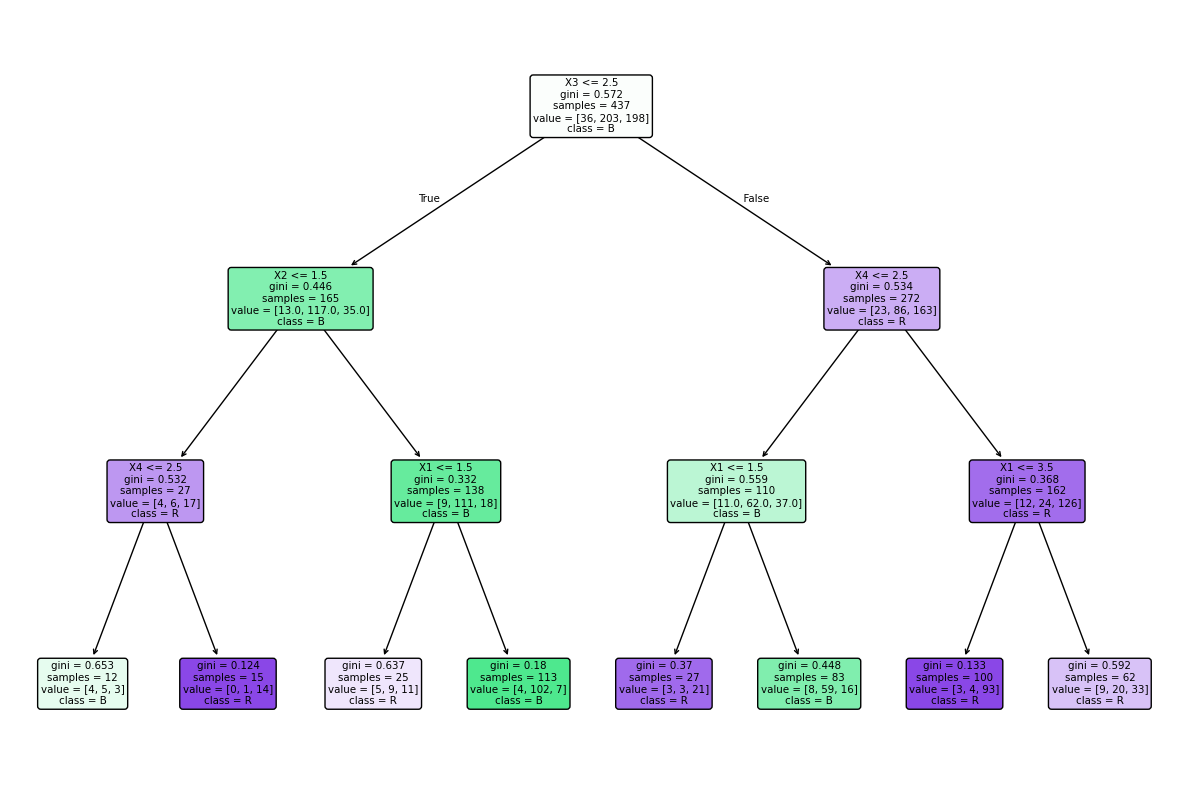

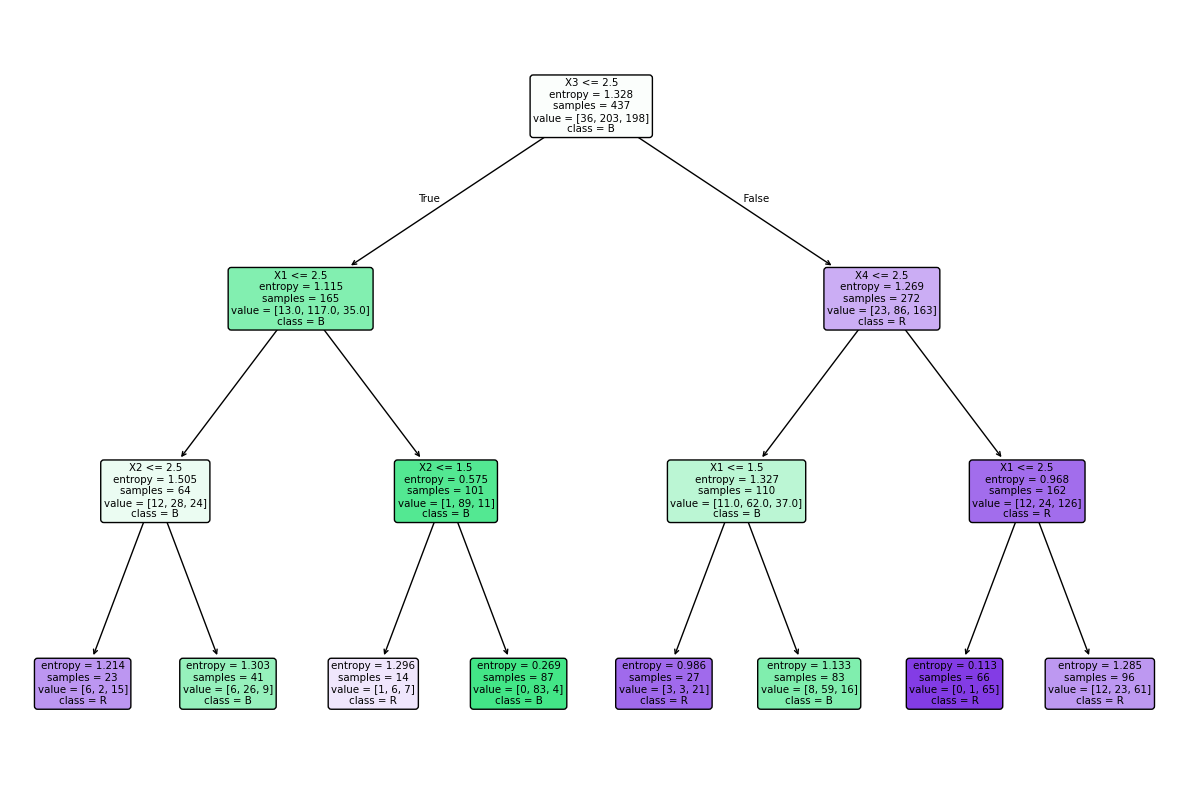

In [13]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Function to import the dataset
def importdata():
    balance_data = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
        sep=',', header=None)

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())

    return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])

Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


import numpy as np — imports NumPy for numeric operations (alias np). Not strongly used later but handy for array ops.

import pandas as pd — imports pandas to read and handle tabular data (DataFrame/Series).

from sklearn.metrics import ... — imports three evaluation utilities:

confusion_matrix — table of true vs predicted counts.

accuracy_score — fraction of correct predictions.

classification_report — per-class precision, recall, F1, support.

from sklearn.model_selection import train_test_split — utility to split arrays into train/test subsets.

from sklearn.tree import DecisionTreeClassifier — class for training a decision tree (CART).

import matplotlib.pyplot as plt — plotting library for visualization.

Function to import the dataset
def importdata():
    balance_data = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
        sep=',', header=None)


Defines function importdata().

pd.read_csv(...) reads the Balance Scale dataset from the UCI URL into a DataFrame named balance_data.

sep=',' uses comma as delimiter.

header=None means the file has no header row; pandas will label columns 0,1,2,....

Result: balance_data is a pandas DataFrame. Typical format: column 0 = class label ('L','B','R'), columns 1–4 = numeric features.

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())

    return balance_data


Prints:

len(balance_data) — number of rows (samples).

balance_data.shape — (n_samples, n_columns).

balance_data.head() — first 5 rows for quick inspection.

Returns the loaded DataFrame to the caller.

Function to split the dataset into features and target variables
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]


Defines splitdataset(balance_data).

balance_data.values returns a NumPy ndarray view of the DataFrame.

X = ...[:, 1:5] slices columns 1,2,3,4 → X is a NumPy array shape (n_samples, 4) (the features).

Y = ...[:, 0] takes column 0 → Y is a 1-D NumPy array shape (n_samples,) containing class labels (strings like 'L', 'B', 'R').

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test


train_test_split(X, Y, test_size=0.3, random_state=100):

Splits data randomly into train and test sets.

test_size=0.3 → 30% test, 70% train.

random_state=100 → reproducible split.

Returns both the full arrays and the split parts.

def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


Defines train_using_gini(...). Note: X_test is passed in the signature but not used inside — it’s redundant.

DecisionTreeClassifier(...) parameters:

criterion="gini" — use Gini impurity to choose splits.

random_state=100 — reproducible tie-breaking / randomness.

max_depth=3 — restrict tree depth to 3 (helps prevent overfitting).

min_samples_leaf=5 — each leaf must have at least 5 samples (another regularizer).

clf_gini.fit(X_train, y_train) trains the classifier. After fit you can access clf_gini.feature_importances_, clf_gini.tree_, etc.

Returns trained classifier object.

def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


Same structure as train_using_gini but with criterion="entropy" (information gain). X_test again unused.

Trains and returns the entropy-based tree.

Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


prediction(X_test, clf_object) calls clf_object.predict(X_test) which returns predicted labels (NumPy array shape (n_test_samples,)).

Prints the predicted array and returns it.

Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))


cal_accuracy(y_test, y_pred) prints:

Confusion matrix,

Accuracy percentage (multiplied by 100),

Classification report (precision, recall, F1 for each class).

Works directly with string labels ('L','B','R') because scikit-learn accepts string labels.

from sklearn import tree
Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


Imports tree module from scikit-learn (gives access to plot_tree).

plot_decision_tree(...):

plt.figure(figsize=(15, 10)) creates a large figure for readability.

tree.plot_tree(...) draws the tree:

filled=True colors nodes by class distribution.

feature_names labels splits (should match the 4 features).

class_names labels the leaf classes (strings).

rounded=True gives rounded node shapes.

plt.show() displays the plot (in notebooks this renders inline; in scripts it opens a window).

if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])


if __name__ == "__main__": ensures this block runs only when the script is executed directly.

Calls importdata() to download and show dataset info.

Calls splitdataset(data) to produce X, Y and the train/test splits.

Trains two trees: clf_gini and clf_entropy.

Visualizes both trees with plot_decision_tree using feature names 'X1'..'X4' and hard-coded class names ['L','B','R'].

# **RANDOM FOREST**

## FOR CLASSIFICATION TASKS

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

titanic_data = pd.read_csv('titanic.csv')

titanic_data = titanic_data.dropna(subset=['Survived'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 3, 'Sex': 1, 'Age': 28.0, 'SibSp': 1, 'Parch': 1, 'Fare': 15.2458}
Predicted Survival: Did Not Survive


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


import pandas as pd — Imports the pandas library to handle tabular data (DataFrame).

from sklearn.model_selection import train_test_split — Imports a utility to split data into training and testing sets.

from sklearn.ensemble import RandomForestClassifier — Imports Random Forest, an ensemble classifier based on multiple decision trees.

from sklearn.metrics import accuracy_score, classification_report — Imports functions to evaluate the model:

accuracy_score → fraction of correct predictions.

classification_report → precision, recall, F1-score per class.

import warnings and warnings.filterwarnings('ignore') — Suppresses warning messages (like future warnings or convergence warnings) to keep output clean.

titanic_data = pd.read_csv('titanic.csv')


Reads the Titanic dataset CSV file into a pandas DataFrame titanic_data.

Each row is a passenger, columns include features like 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', and target 'Survived'.

titanic_data = titanic_data.dropna(subset=['Survived'])


Drops any rows where 'Survived' is missing (NaN) to ensure the target variable is complete.

Keeps only rows with known outcomes.

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']


X → selects columns/features used for prediction:

'Pclass' → passenger class (1,2,3)

'Sex' → gender

'Age' → age of passenger

'SibSp' → siblings/spouses aboard

'Parch' → parents/children aboard

'Fare' → ticket fare

y → the target variable 'Survived' (0 = did not survive, 1 = survived).

X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})


Converts 'Sex' from categorical to numeric:

'female' → 0

'male' → 1

.loc[:, 'Sex'] ensures assignment to the column safely without triggering a SettingWithCopyWarning.

X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)


Handles missing age values (NaN) by replacing them with the median age of the dataset.

inplace=True updates the column directly.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splits the data into training and testing sets:

test_size=0.2 → 20% of data is held out for testing.

random_state=42 → ensures the split is reproducible.

Shapes:

X_train → ~80% of features

X_test → ~20% of features

y_train, y_test → corresponding target labels.

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


Initializes a Random Forest classifier with:

n_estimators=100 → 100 decision trees in the ensemble.

random_state=42 → reproducible results.

rf_classifier.fit(X_train, y_train)


Trains the Random Forest classifier on the training data.

Each tree learns patterns to predict survival based on passenger features.

y_pred = rf_classifier.predict(X_test)


Uses the trained Random Forest to predict survival for the test set passengers.

y_pred is an array of predicted labels (0 or 1).

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


accuracy_score → calculates the fraction of correct predictions on the test set.

classification_report → prints precision, recall, F1-score for both classes (survived vs did not survive).

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Prints the accuracy (rounded to 2 decimals).

Prints the detailed classification report.

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)


Selects the first row of X_test as a sample passenger.

Uses the trained classifier to predict survival for this single passenger.

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")


Converts the sample passenger’s features to a dictionary for readable printing.

Prints the passenger’s data.

Prints predicted survival:

If prediction[0] == 1 → "Survived"

Else → "Did Not Survive"

## FOR REGRESSION TASKS

In [16]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Predicted Value: 0.51
Actual Value: 0.48
Mean Squared Error: 0.26
R-squared Score: 0.81


import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd — Import pandas for data manipulation (DataFrame operations).

from sklearn.datasets import fetch_california_housing — Fetch the California Housing dataset from scikit-learn.

from sklearn.model_selection import train_test_split — Import function to split data into training and testing sets.

from sklearn.ensemble import RandomForestRegressor — Import Random Forest Regressor, an ensemble method for regression tasks.

from sklearn.metrics import mean_squared_error, r2_score — Import evaluation metrics:

mean_squared_error → measures average squared difference between predicted and actual values.

r2_score → proportion of variance in the dependent variable explained by the model.

python
Copy code
california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target
fetch_california_housing() downloads the dataset and returns a Bunch object (like a dict).

california_housing.data → features (NumPy array), california_housing.feature_names → feature names.

pd.DataFrame(...) → converts features into a DataFrame.

california_data['MEDV'] = california_housing.target → adds target variable 'MEDV' (Median House Value) as a new column.

python
Copy code
X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']
X → all feature columns (everything except 'MEDV')

y → target variable 'MEDV' (median house value)

python
Copy code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Splits data into training and testing sets:

test_size=0.2 → 20% of data for testing, 80% for training.

random_state=42 → ensures reproducibility.

python
Copy code
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
Creates a Random Forest Regressor object with:

n_estimators=100 → 100 decision trees in the ensemble.

random_state=42 → reproducible results.

python
Copy code
rf_regressor.fit(X_train, y_train)
Trains the Random Forest model on the training data (X_train, y_train).

Each tree learns patterns to predict house values.

python
Copy code
y_pred = rf_regressor.predict(X_test)
Uses the trained model to predict house values for the test set.

y_pred is a NumPy array of predicted values.

python
Copy code
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_squared_error(y_test, y_pred) → calculates the average squared difference between predicted and actual house values.

r2_score(y_test, y_pred) → computes how well the model explains variance in the target (1.0 = perfect prediction, 0 = no explanatory power).

python
Copy code
single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")
X_test.iloc[0].values → selects the first row of X_test as a NumPy array.

.reshape(1, -1) → reshapes it to 2D (1, n_features) because scikit-learn expects 2D input.

rf_regressor.predict(single_data) → predicts the house value for that single sample.

Prints the predicted and actual house value for comparison.

python
Copy code
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
Prints model evaluation metrics on the test set:

MSE (lower is better)

R² (closer to 1 is better)

# **SUPPORT VECTOR MACHINE**

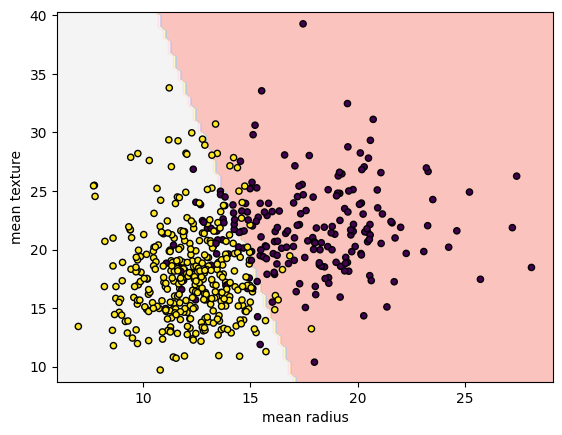

In [17]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer — Imports the Breast Cancer dataset (binary classification).

import matplotlib.pyplot as plt — Imports matplotlib for plotting graphs.

from sklearn.inspection import DecisionBoundaryDisplay — Utility to plot decision boundaries of classifiers.

from sklearn.svm import SVC — Imports Support Vector Classifier, a type of SVM for classification tasks.

python
Copy code
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target
load_breast_cancer() loads the dataset into a Bunch object containing:

.data → features (569 samples × 30 features)

.target → labels (0 = malignant, 1 = benign)

X = cancer.data[:, :2] → selects only the first two features (for visualization in 2D).

y = cancer.target → the labels (0 or 1).

python
Copy code
svm = SVC(kernel="linear", C=1)
svm.fit(X, y)
Creates a Support Vector Machine classifier:

kernel="linear" → linear decision boundary.

C=1 → regularization parameter (balances margin width and misclassification).

svm.fit(X, y) → trains the SVM on the first two features and labels.

python
Copy code
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )
Plots the decision boundary of the trained SVM.

from_estimator(...) automatically computes a grid over the feature space and colors regions by predicted class. Parameters:

svm → the trained classifier.

X → input features (for grid limits).

response_method="predict" → use SVM predictions to determine class regions.

alpha=0.8 → transparency of colored regions.

cmap="Pastel1" → color map for regions.

xlabel and ylabel → names of the two features.

python
Copy code
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
Plots the original data points on top of the decision boundary.

Parameters:

X[:,0] and X[:,1] → first and second features.

c=y → color points based on class labels.

s=20 → marker size.

edgecolors="k" → black edge around markers.

python
Copy code
plt.show()
Displays the plot with decision boundary and scatter points.



# HYPERPARAMETER TUNING

## TUNING LOGISTIC REGRESSION WITH GRID SEARCHCV

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(0.006105402296585327)}
Best score is 0.853


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression — Imports Logistic Regression for classification tasks.

from sklearn.model_selection import GridSearchCV — Imports GridSearchCV, which is used to automatically tune hyperparameters by trying all combinations and performing cross-validation.

import numpy as np — Imports NumPy for numerical operations.

from sklearn.datasets import make_classification — Imports a function to generate a synthetic classification dataset.

python
Copy code
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
Generates a synthetic binary classification dataset:

n_samples=1000 → 1000 data points.

n_features=20 → 20 features per sample.

n_informative=10 → 10 features are informative (helpful for prediction).

n_classes=2 → binary classification.

random_state=42 → reproducible results.

X → feature matrix (1000, 20).

y → target array (1000,).

python
Copy code
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
np.logspace(-5, 8, 15) → creates 15 values spaced logarithmically between 10^-5 and 10^8.

param_grid = {'C': c_space} → defines the hyperparameter grid for Logistic Regression:

C → inverse of regularization strength (C small → strong regularization, C large → weak regularization).

GridSearchCV will try all values in c_space.

python
Copy code
logreg = LogisticRegression()
Creates a Logistic Regression model object with default parameters.

python
Copy code
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
Wraps the Logistic Regression model into GridSearchCV:

logreg → the model to tune.

param_grid → dictionary of hyperparameters to try.

cv=5 → 5-fold cross-validation (data is split into 5 folds, training on 4 folds and validating on 1 fold each time).

python
Copy code
logreg_cv.fit(X, y)
Performs Grid Search with 5-fold cross-validation:

Trains Logistic Regression on all combinations of C values.

Evaluates performance using cross-validation.

Finds the best C value giving the highest mean cross-validation score.

python
Copy code
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
logreg_cv.best_params_ → prints the best hyperparameters found by GridSearchCV (the C value giving highest CV accuracy).

logreg_cv.best_score_ → prints the mean cross-validation score corresponding to the best hyperparameters.

## TUNING DECISION TREE WITH RANDOMIZEDSEARCH CV

In [19]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.793


import numpy as np
from sklearn.datasets import make_classification
import numpy as np — Imports NumPy for numerical operations.

from sklearn.datasets import make_classification — Imports a function to generate a synthetic classification dataset.

python
Copy code
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
Generates a synthetic dataset:

n_samples=1000 → 1000 data points.

n_features=20 → 20 features per sample.

n_informative=10 → 10 features are informative for classification.

n_classes=2 → binary classification.

random_state=42 → reproducible results.

X → feature matrix (1000, 20)

y → target labels (1000,)

python
Copy code
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint → imports random integer distribution, used for sampling hyperparameters in RandomizedSearchCV.

from sklearn.tree import DecisionTreeClassifier → imports Decision Tree classifier.

from sklearn.model_selection import RandomizedSearchCV → imports RandomizedSearchCV, which performs random search over hyperparameter space with cross-validation.

python
Copy code
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}
Defines the hyperparameter search space for Decision Tree:

"max_depth": [3, None] → maximum depth of tree (3 or unlimited).

"max_features": randint(1, 9) → number of features to consider when looking for the best split (randomly sampled integers from 1 to 8).

"min_samples_leaf": randint(1, 9) → minimum samples required to be at a leaf node (random integers 1–8).

"criterion": ["gini", "entropy"] → splitting criterion: gini or entropy.

python
Copy code
tree = DecisionTreeClassifier()
Creates a Decision Tree classifier object with default parameters.

python
Copy code
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
Wraps the Decision Tree in RandomizedSearchCV:

tree → model to tune.

param_dist → hyperparameter distribution to sample from.

cv=5 → 5-fold cross-validation (splits dataset into 5 parts to evaluate each sampled configuration).

RandomizedSearchCV randomly selects a number of hyperparameter combinations from the defined distributions (unlike GridSearchCV which tries all combinations).

python
Copy code
tree_cv.fit(X, y)
Runs the randomized search:

Randomly samples hyperparameter combinations.

Trains Decision Tree models with each combination.

Evaluates using 5-fold cross-validation.

Identifies the best hyperparameter combination.

python
Copy code
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
tree_cv.best_params_ → prints the best hyperparameters found by RandomizedSearchCV.

tree_cv.best_score_ → prints the best mean cross-validation score corresponding to those hyperparameters.

# AUC -ROC CURVE

## ROC-AUC FOR TWO CLASS MODEL

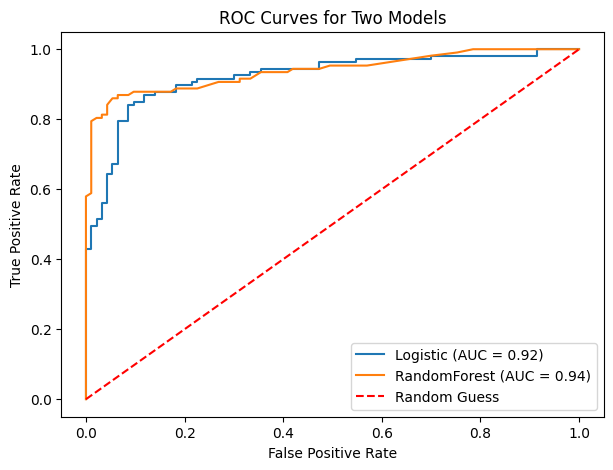

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'RandomForest': y_pred_rf})


plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()





import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np → for numerical operations.

import pandas as pd → for creating and manipulating dataframes.

import matplotlib.pyplot as plt → for plotting graphs.

from sklearn.datasets import make_classification → to generate a synthetic classification dataset.

from sklearn.model_selection import train_test_split → to split data into training and testing sets.

from sklearn.linear_model import LogisticRegression → imports Logistic Regression classifier.

from sklearn.ensemble import RandomForestClassifier → imports Random Forest classifier.

from sklearn.metrics import roc_curve, auc → functions to compute ROC curve and AUC (Area Under Curve).

python
Copy code
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)
Generates a synthetic binary classification dataset with:

1000 samples, 20 features, 2 classes.

random_state=42 ensures reproducibility.

X → features (1000, 20)

y → labels (1000,)

python
Copy code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
Splits dataset into training (80%) and testing (20%) sets.

random_state=42 ensures consistent splits every run.

python
Copy code
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
Creates and trains a Logistic Regression model on training data.

python
Copy code
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
Creates and trains a Random Forest classifier with:

n_estimators=100 → 100 trees in the forest.

python
Copy code
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
Predicts probabilities for the positive class (class 1) for the test set:

predict_proba(X_test)[:,1] → probability of class 1.

python
Copy code
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'RandomForest': y_pred_rf})
Creates a DataFrame containing:

'True' → actual labels.

'Logistic' → predicted probabilities from Logistic Regression.

'RandomForest' → predicted probabilities from Random Forest.

python
Copy code
plt.figure(figsize=(7, 5))
Initializes a new plot with size 7×5 inches.

python
Copy code
for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
Loops over the two models to compute and plot their ROC curves:

roc_curve(test_df['True'], test_df[model]) → computes False Positive Rate (FPR) and True Positive Rate (TPR) at different thresholds.

auc(fpr, tpr) → calculates Area Under Curve (AUC) for the ROC curve.

plt.plot(fpr, tpr, ...) → plots ROC curve with label showing model name and AUC.

python
Copy code
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
Plots the baseline diagonal line (random guessing classifier):

FPR = TPR

Red dashed line 'r--'.

python
Copy code
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()
Adds axis labels and plot title.

Adds legend to differentiate models.

Displays the ROC curves.

## ROC - AUC FOR MULTICALSS MODEL

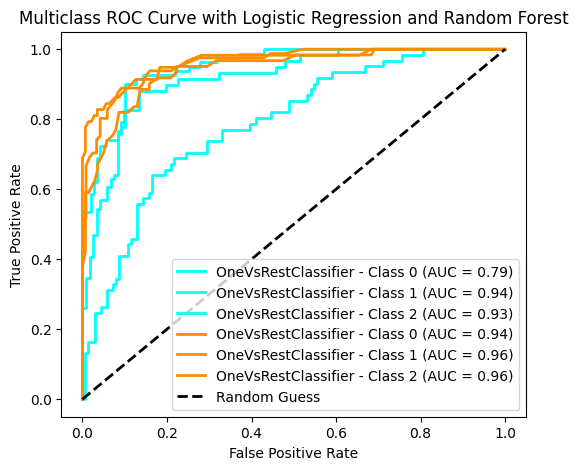

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)

y_bin = label_binarize(y, classes=np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42)

logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, y_train)

rf_model = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()

models = [logistic_model, rf_model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for model, color in zip(models, colors):
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{model.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()




import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np → for numerical operations.

import matplotlib.pyplot as plt → for plotting graphs.

from sklearn.datasets import make_classification → to generate a synthetic dataset.

from sklearn.model_selection import train_test_split → to split data into training/testing sets.

from sklearn.preprocessing import label_binarize → converts multiclass labels into one-hot encoded format.

from sklearn.multiclass import OneVsRestClassifier → allows fitting multiclass classifiers using a one-vs-rest strategy.

from sklearn.linear_model import LogisticRegression → for Logistic Regression classifier.

from sklearn.ensemble import RandomForestClassifier → for Random Forest classifier.

from sklearn.metrics import roc_curve, auc → to compute ROC curves and area under curve (AUC).

from itertools import cycle → to cycle through colors for plotting multiple lines.

python
Copy code
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)
Generates a synthetic multiclass dataset:

n_samples=1000 → 1000 samples.

n_features=20 → 20 features per sample.

n_classes=3 → three target classes.

n_informative=10 → 10 informative features.

random_state=42 → reproducibility.

X → features (1000, 20)

y → labels (1000,) with values 0, 1, 2.

python
Copy code
y_bin = label_binarize(y, classes=np.unique(y))
Converts y into one-hot encoded format for multiclass ROC computation:

Original y = [0, 1, 2]

y_bin → shape (1000, 3), e.g., class 1 → [0,1,0].

python
Copy code
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42)
Splits the dataset into training (80%) and testing (20%) sets.

random_state=42 ensures consistent split.

python
Copy code
logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, y_train)
Wraps Logistic Regression in OneVsRestClassifier for multiclass handling:

Trains a separate Logistic Regression model for each class vs. the rest.

Fits the model on training data.

python
Copy code
rf_model = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
Wraps Random Forest in OneVsRestClassifier for multiclass classification.

Trains 3 separate Random Forest classifiers (one for each class vs. rest).

python
Copy code
fpr = dict()
tpr = dict()
roc_auc = dict()
Initializes dictionaries to store FPR, TPR, and AUC values for each class.

python
Copy code
models = [logistic_model, rf_model]
plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])
Stores both models in a list for looping.

Creates a new figure for plotting.

colors = cycle(['aqua', 'darkorange']) → cycle through colors for each model.

python
Copy code
for model, color in zip(models, colors):
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{model.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})')
Loops over models (Logistic and RandomForest) and colors.

Loops over each class i:

roc_curve(y_test[:, i], model.predict_proba(X_test)[:, i]) → computes FPR, TPR for class i.

auc(fpr[i], tpr[i]) → computes area under ROC curve for class i.

plt.plot(...) → plots ROC curve for each class with color and AUC label.

python
Copy code
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
Plots a diagonal reference line (random classifier).

'k--' → black dashed line.

python
Copy code
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()
Adds axis labels, title, legend.

Displays the ROC curves for all classes and both models.



#